# Лінійна регресія: перенавчання і регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

В усіх комірках, де вказаний коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Решту комірок із кодом (без коментарів) треба просто виконати. Крім того, у завданні необхідно відповідати на запитання; відповіді потрібно вписувати після виділеного слова "__Відповідь:__".

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ми будемо працювати з датасетом __"bikes_rent.csv"__, у якому по днях записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день. Останнє ми будемо передбачати; таким чином, ми будемо розв'язувати завдання регресії.

### Ознайомлення з даними

## Завдання 1

Завантажте датасет за допомогою функції __pandas.read_csv__ у змінну __df__. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [36]:
df = pd.read_csv("bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


Для кожного дня прокату відомі такі ознаки:
* _season_: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
* _yr_: 0 — 2011, 1 — 2012
* _mnth_: від 1 до 12
* _holiday_: 0 — немає свята, 1 — є свято
* _weekday_: від 0 до 6
* _workingday_: 0 — неробочий день, 1 — робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура в Цельсіях
* _atemp_: температура за відчуттями в Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях за годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної **cnt**.

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


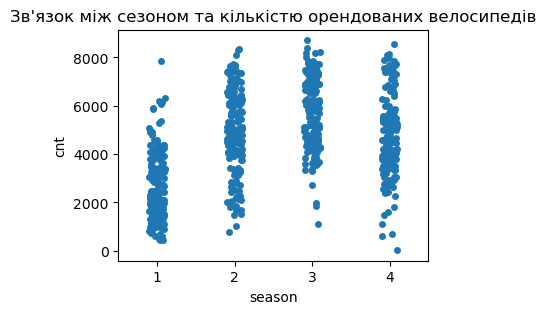

In [37]:

df.replace([np.inf, -np.inf], np.nan, inplace=True)
plt.figure(figsize=(4, 3))
sns.stripplot(x='season', y='cnt', data=df)
plt.xticks()

plt.title("Зв'язок між сезоном та кількістю орендованих велосипедів")
plt.show()

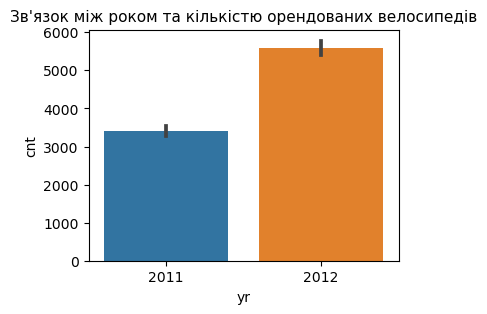

In [38]:

plt.figure(figsize=(4, 3))
sns.barplot(x='yr', y='cnt', data=df, order=[0, 1])
plt.xticks([0, 1], ["2011", "2012"])

plt.title("Зв'язок між роком та кількістю орендованих велосипедів", fontsize=11)
plt.show()

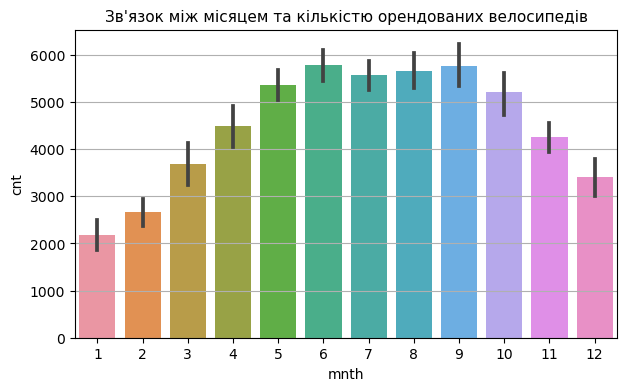

In [39]:
plt.figure(figsize=(7, 4))
sns.barplot(x='mnth', y='cnt', data=df)
plt.xticks()
plt.grid(axis='y')
plt.title("Зв'язок між місяцем та кількістю орендованих велосипедів", fontsize=11)
plt.show()

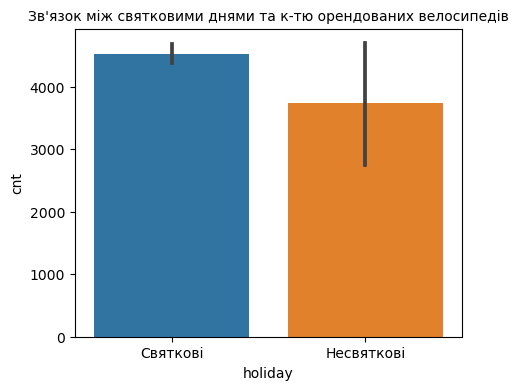

In [7]:
plt.figure(figsize=(5, 4))
sns.barplot(x='holiday', y='cnt', data=df, order=[0, 1])
plt.xticks([0, 1], ["Святкові", "Несвяткові"])

plt.title("Зв'язок між святковими днями та к-тю орендованих велосипедів", fontsize=10)
plt.show()

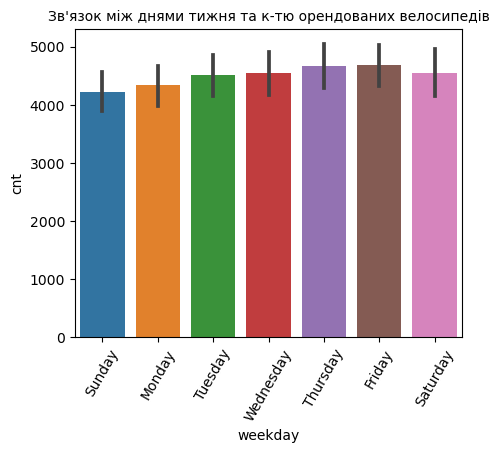

In [8]:
plt.figure(figsize=(5, 4))
sns.barplot(x='weekday', y='cnt', data=df, order=[0, 1, 2, 3, 4, 5, 6])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Sunday", 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=60)

plt.title("Зв'язок між днями тижня та к-тю орендованих велосипедів", fontsize=10)
plt.show()

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


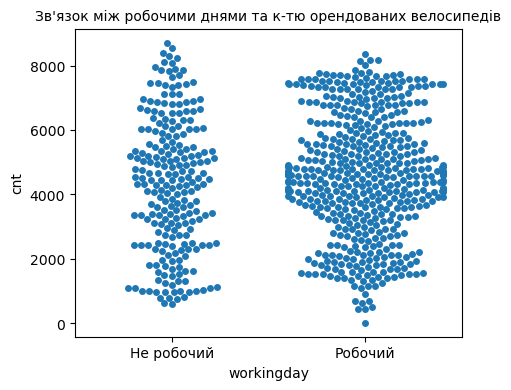

In [9]:
plt.figure(figsize=(5, 4))
sns.swarmplot(x='workingday', y='cnt', data=df, order=[0, 1])
plt.xticks([0, 1], ["Не робочий", "Робочий"])

plt.title("Зв'язок між робочими днями та к-тю орендованих велосипедів", fontsize=10)
plt.show()

D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


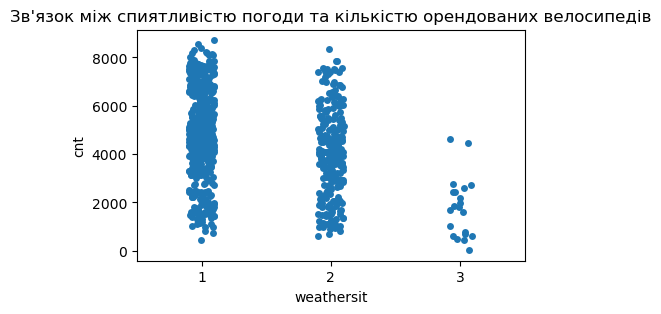

In [11]:
plt.figure(figsize=(5, 3))
sns.stripplot(x='weathersit', y='cnt', data=df)
plt.xticks()

plt.title("Зв'язок між спиятливістю погоди та кількістю орендованих велосипедів")
plt.show()

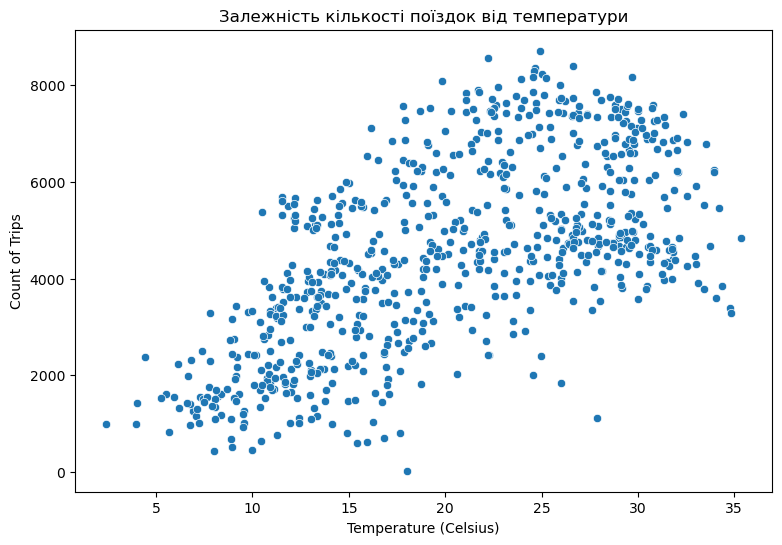

In [12]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='temp', y='cnt', data=df)

plt.xlabel("Temperature (Celsius)")
plt.ylabel("Count of Trips")
plt.title("Залежність кількості поїздок від температури")

plt.show()

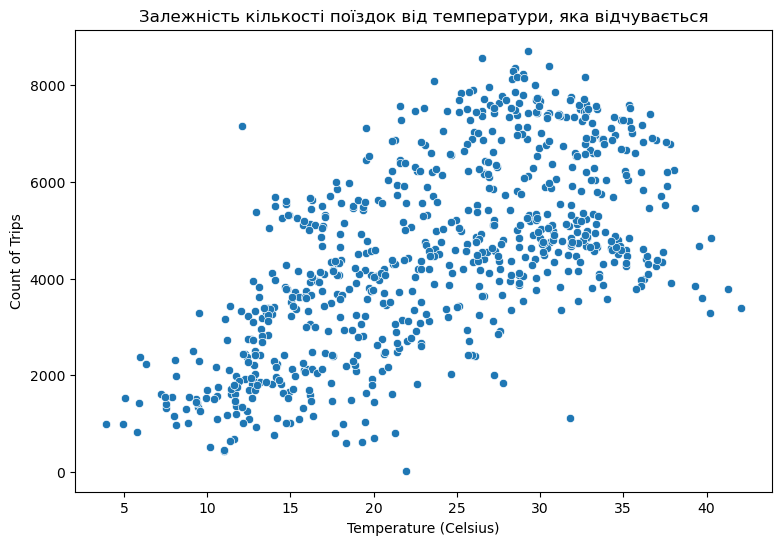

In [13]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='atemp', y='cnt', data=df)

plt.xlabel("Temperature (Celsius)")
plt.ylabel("Count of Trips")
plt.title("Залежність кількості поїздок від температури, яка відчувається")

plt.show()

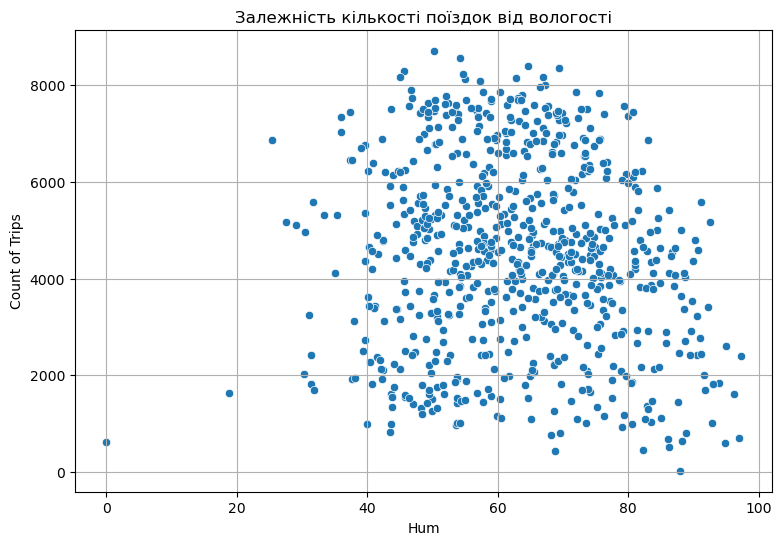

In [54]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='hum', y='cnt', data=df)

plt.xlabel("Hum")
plt.ylabel("Count of Trips")
plt.title("Залежність кількості поїздок від вологості")
plt.grid()
plt.show()

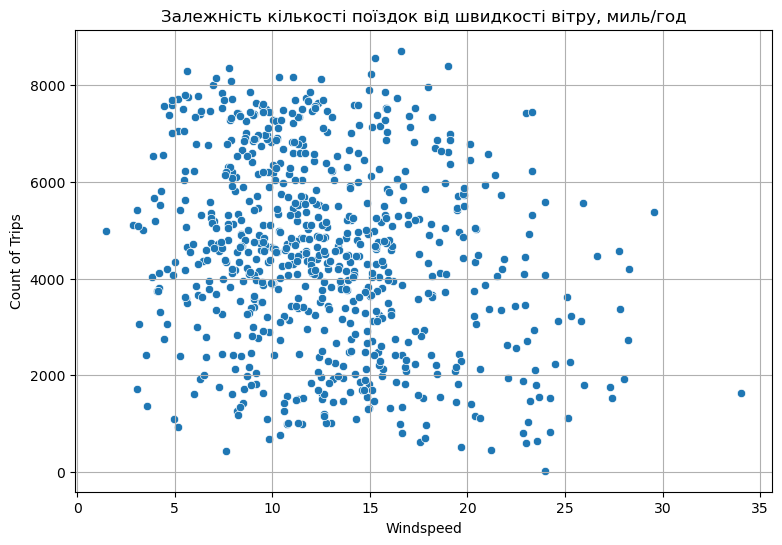

In [14]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='windspeed(mph)', y='cnt', data=df)

plt.xlabel("Windspeed")
plt.ylabel("Count of Trips")
plt.title("Залежність кількості поїздок від швидкості вітру, миль/год")
plt.grid()
plt.show()

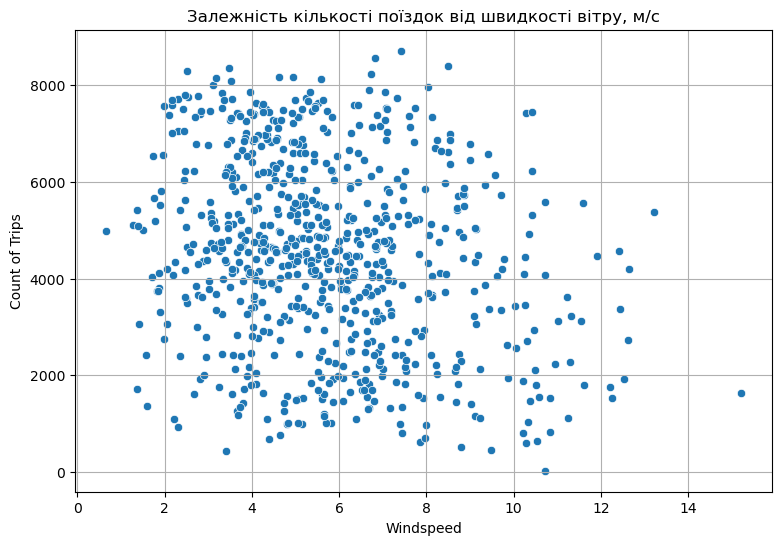

In [15]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='windspeed(ms)', y='cnt', data=df)

plt.xlabel("Windspeed")
plt.ylabel("Count of Trips")
plt.title("Залежність кількості поїздок від швидкості вітру, м/с")
plt.grid()
plt.show()

__Запитання:__
1. Яким є характер залежності кількості прокатів від місяця? - Характер залежності кількості прокатів від місяця є сезонним (параболічним) і пов'язаним з температурою: влітку та на вересень припадає найбільша кількість прокатів, оскільки є вищою температура повітря і сприятливіші погодні умови, та кількість меншає коли прохолодно вже, або ще не потепліло.
1. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно. - Однією з ознак, від якої кількість прокатів може залежати лінійно, є "температура". Чим тепліше погода, тим більше людей, ймовірно, візьмуть велосипед напрокат.

Іншою можливою ознакою є "чаь). Якщо спостерігається певний патерн в залежності кількості прокатів від часу (наприклад, збільшення ввечері або в вихідні дні), це може вказувати на лінійну залежність.

## Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [40]:
correlations = df.iloc[:, :-1].corrwith(df.iloc[:, -1])
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

## Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt
за допомогою методу corr:

In [41]:
correlation_matrix = df.iloc[:, 7:].corr()
print(correlation_matrix)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

## Завдання 4

Виведіть середні ознак.

In [42]:
columns = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']
means = df[columns].mean()
print(round(means, 3))

temp              20.311
atemp             23.718
hum               62.789
windspeed(mph)    12.763
windspeed(ms)      5.705
dtype: float64


Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [43]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [44]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [45]:
from sklearn.linear_model import LinearRegression

## Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.


In [46]:
reg = LinearRegression().fit(X, y)
feature_weights = [i for i in list(zip(df.columns, reg.coef_))]
print(feature_weights)

[('season', 570.8683682349464), ('yr', 1021.9655165928652), ('mnth', -141.30480132476436), ('holiday', -86.75977350260133), ('weekday', 137.22429786240198), ('workingday', 56.391510481686474), ('weathersit', -330.2285514523417), ('temp', 367.4696244443872), ('atemp', 585.5608798848713), ('hum', -145.61062773283885), ('windspeed(mph)', 12459233387995.324), ('windspeed(ms)', -12459233388193.781)]


Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо в $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколінеарності_.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а у другому — Ridge.

### Завдання 6
Давайте спробуємо навчити лінійні моделі з $L_1$ і $L_2$-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги.

In [56]:
from sklearn.linear_model import Ridge, Lasso

# Навчаємо
lasso_regressor = Lasso()

lasso_regressor.fit(X, y)

# Виведення ваг моделей
print("\nWeights of the Lasso regression model:")
for feature, weight in zip(columns, lasso_regressor.coef_):
    print(f"{feature}: {weight}")


Weights of the Lasso regression model:
season: 560.2416160308862
yr: 1019.4634940657195
mnth: -128.73062703678715
holiday: -86.15278133371106
weekday: 137.34789390496323
workingday: 55.21237064135662
weathersit: -332.3698569623487
temp: 376.36323620969586
atemp: 576.5307935045538
hum: -144.12915500348592
windspeed(mph): -197.13968940248492
windspeed(ms): -2.8050769963390902e-08


In [57]:
ridge_regressor = Ridge()

ridge_regressor.fit(X, y)

print("Weights of the Ridge regression model:")
for feature, weight in zip(df.columns[:-1], ridge_regressor.coef_):
     print(f"{feature}: {weight}")


Weights of the Ridge regression model:
season: 563.0645722520198
yr: 1018.9483787875305
mnth: -131.8733202824793
holiday: -86.74609799709206
weekday: 138.005111178719
workingday: 55.903110375064756
weathersit: -332.3497884990733
temp: 386.457889191948
atemp: 566.3470470600261
hum: -145.07132729867166
windspeed(mph): -99.25944108188017
windspeed(ms): -99.25944115425338


Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги.

### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги у список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги у список`coefs_ridge`. Конвертуйте отримані списки в `np.array`.

In [58]:
alphas = np.arange(1, 500, 50)

lasso_coefficients = []
ridge_coefficients = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(df.drop(columns='cnt'), df['cnt'])
    lasso_coefficients.append(lasso.coef_)

    ridge = Ridge(alpha=alpha)
    ridge.fit(df.drop(columns='cnt'), df['cnt'])
    ridge_coefficients.append(ridge.coef_)

lasso_coefficients = np.array(lasso_coefficients)
ridge_coefficients = np.array(ridge_coefficients)

Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

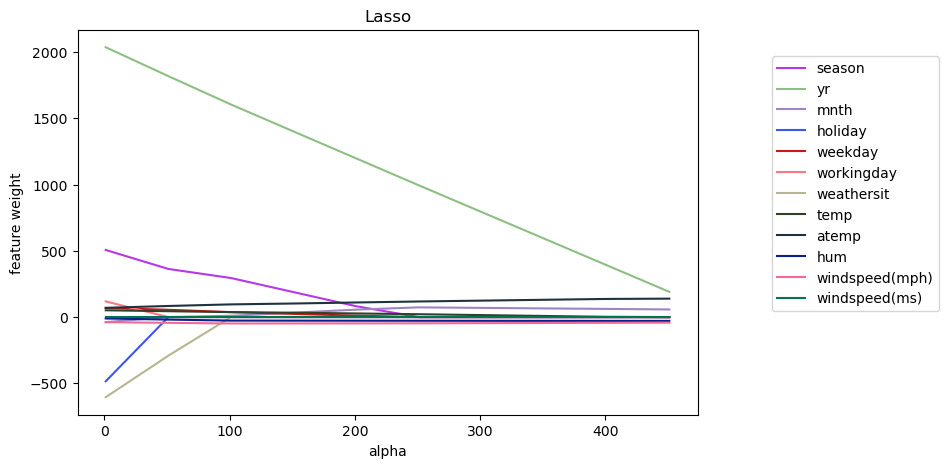

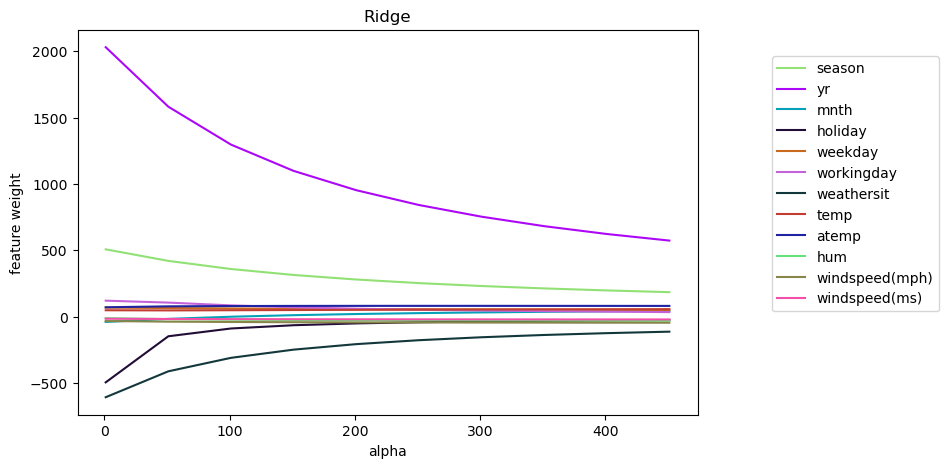

In [59]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha? - Lasso агресивніше зменшує ваги при одному й тому самому alpha, оскільки стягує ваги до нуля
2. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається. - Якщо alpha для Lasso зробити дуже великим, то всі ваги, крім константного члена, будуть зведені до нуля. Це стається через те, що Lasso використовує -регуляризацію, яка намагається мінімізувати суму абсолютних значень коефіцієнтів
3. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` при будь-якому значенні `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший $10^{-3}$. - Так, Lasso виключив одну з ознак windspeed при будь-якому значенні alpha > 0 через особливості регуляризації, яка штрафує за великі абсолютні значення коефіцієнтів. У Ridge це трапиться тільки за умови, що alpha велике, щоб компенсувати штраф за великі значення коефіцієнтів.
4. Який із регуляризаторів підійде для відбору неінформативних ознак? - Lasso більш підійде для відбору неінформативних ознак, оскільки він зводить до нуля ваги незначущих ознак, тоді як Ridge зменшує, але не виключає їх повністю.к?

### Завдання 8

Далі будемо працювати з `Lasso`.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто `Mean Square Error`.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а в coef\_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` в залежності від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [77]:
# def create_plot(data, title, xlabel, ylabel, figsize=None):
#     size = figsize or (15, 5)
#     plt.figure(figsize=size)

#     x = map(lambda e: e[0], data)
#     y = map(lambda e: e[1], data)
#     plt.plot(x, y)

#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     plt.grid()
#     plt.show()

def create_plot(x, y, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()


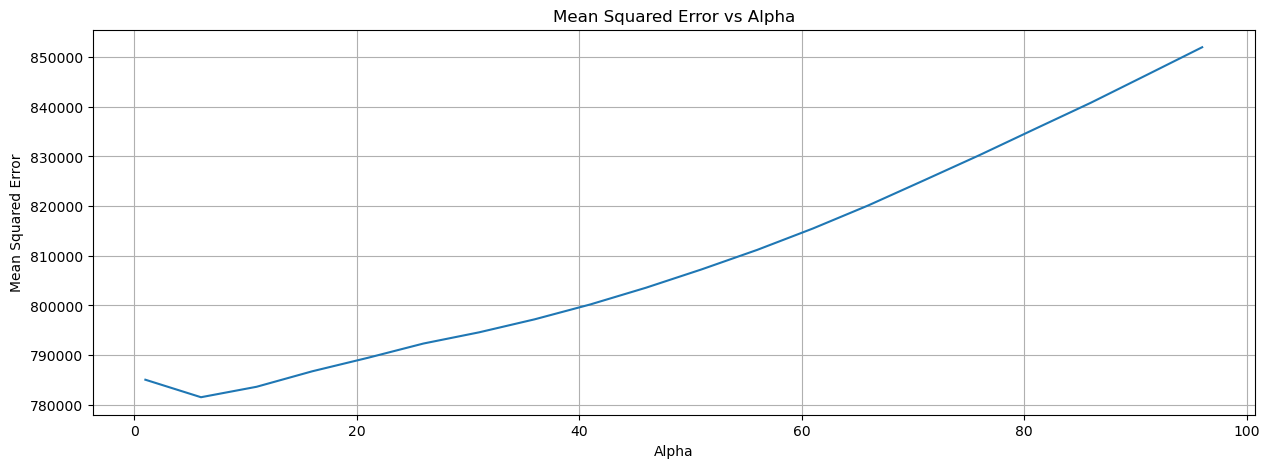

Selected alpha: 6
Feature coefficient pairs:
('season', 532.0189828413537)
('yr', 1015.0602226430597)
('mnth', -100.03952614356638)
('holiday', -83.29395987529907)
('weekday', 132.50446549095793)
('workingday', 51.55708561407392)
('weathersit', -330.5598567399813)
('temp', 370.6798550300334)
('atemp', 581.3969310654987)
('hum', -140.00740550068866)
('windspeed(mph)', -191.77140847134925)
('windspeed(ms)', -2.6855907924014633e-08)


In [78]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)

mse_avg = np.mean(regressor.mse_path_, axis=1)
alpha_optimal = regressor.alpha_
coef_pairs = zip(df.columns[:-1], regressor.coef_)

mse_avg = list(mse_avg)
coef_pairs = list(coef_pairs)

create_plot(regressor.alphas_, mse_avg, 
            "Mean Squared Error vs Alpha", 
            "Alpha", 
            "Mean Squared Error")

print(f"Selected alpha: {alpha_optimal}")
print("Feature coefficient pairs:")
for pair in coef_pairs:
    print(pair)

Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбитті (тобто за стовпцями).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.


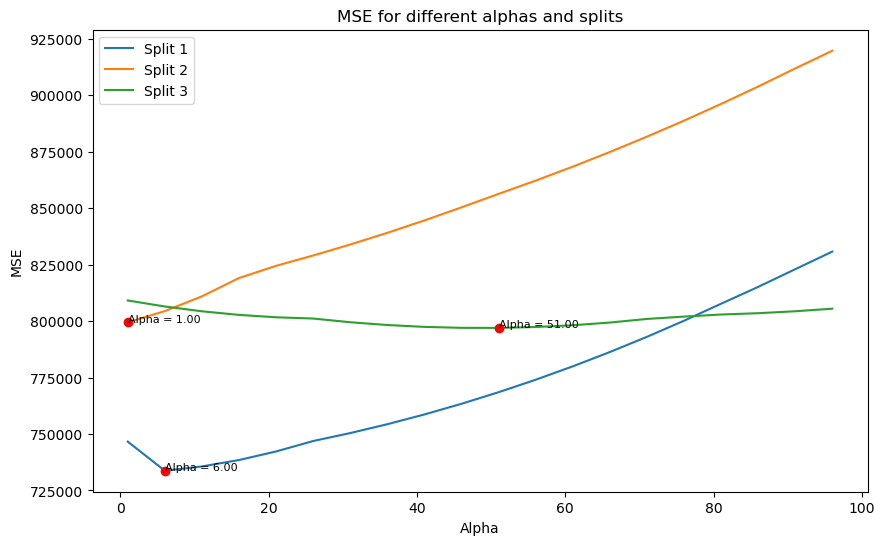

In [80]:
min_alphas = regressor.alphas_[np.argmin(regressor.mse_path_, axis=0)]

plt.figure(figsize=(10, 6))

for i in range(regressor.mse_path_.shape[1]):
    plt.plot(regressor.alphas_, regressor.mse_path_[:, i], label=f'Split {i+1}')

for i, alpha in enumerate(min_alphas):
    plt.plot(alpha, regressor.mse_path_[np.argmin(regressor.mse_path_, axis=0)[i], i], 'ro')
    plt.text(alpha, regressor.mse_path_[np.argmin(regressor.mse_path_, axis=0)[i], i], f'Alpha = {alpha:.2f}', fontsize=8)

plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for different alphas and splits')
plt.legend()
plt.show()

На кожному розбитті оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

#### Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей `cnt` від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

__Відповідь:__

In [82]:
# Get the feature names
feature_names = df.columns[:-1]

# Get the coefficients and sort them
coef_values = regressor.coef_
sorted_indices = np.argsort(coef_values)

# Get the names of the top 4 features
top_features = feature_names[sorted_indices[-4:]]
print("Top 4 features with the largest positive coefficients:")
for feature in top_features:
    print(feature)

Top 4 features with the largest positive coefficients:
temp
season
atemp
yr


D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

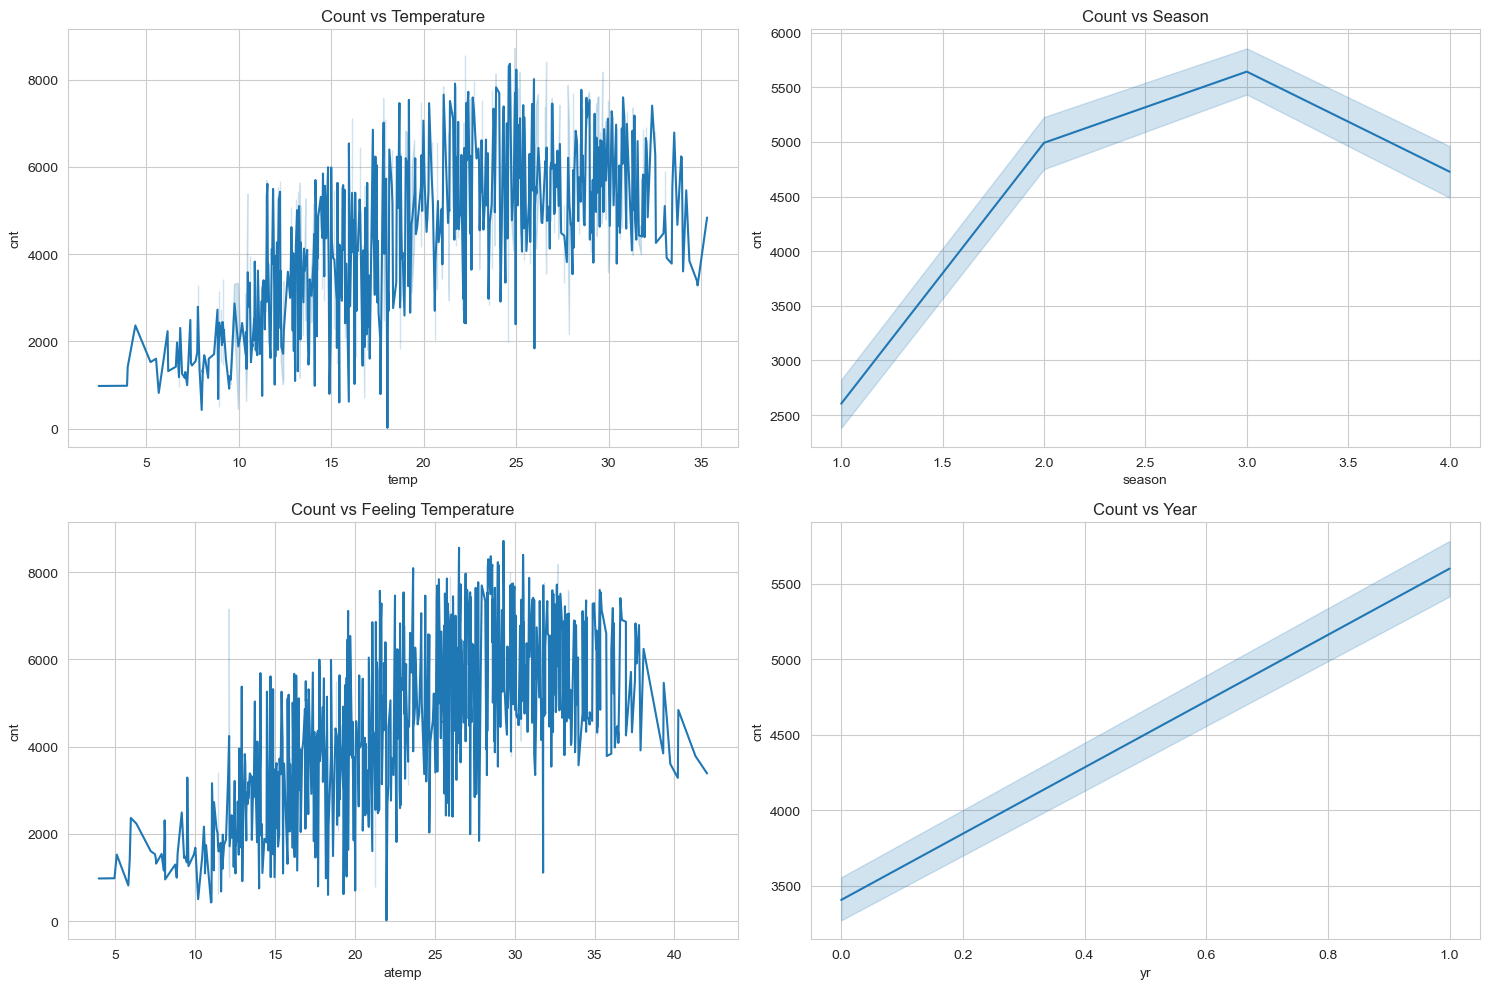

In [84]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot cnt vs temp
sns.lineplot(x='temp', y='cnt', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Count vs Temperature')

# Plot cnt vs season
sns.lineplot(x='season', y='cnt', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count vs Season')

# Plot cnt vs atemp
sns.lineplot(x='atemp', y='cnt', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Count vs Feeling Temperature')

# Plot cnt vs yr
sns.lineplot(x='yr', y='cnt', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Count vs Year')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
Не зовсім логічно стверджувати, що чим вище значення цих ознак, тим більше буде прокатів велосипедів. Далі по кожній ознаці:
- зміна сезону (пори року) впливає, але не прямолінійно, а параболічно. 
- зміна температури буде впливати лінійно, але також до певної межі. Адже при аномально високих температурах навряд чи буде багато прокатів
- логічно збільшення значення року також не може впливати на збільшення прокатів напряму, хоча на графіку це лінійна залежність

#### Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

__Відповідь:__

In [87]:
# Get features with the largest negative coefficients
top_negative_features = feature_names[np.argsort(coef_values)[:3]]

print("Top 3 features with the largest negative coefficients:")
for feature in top_negative_features:
    print(feature)


Top 3 features with the largest negative coefficients:
weathersit
windspeed(mph)
hum


D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

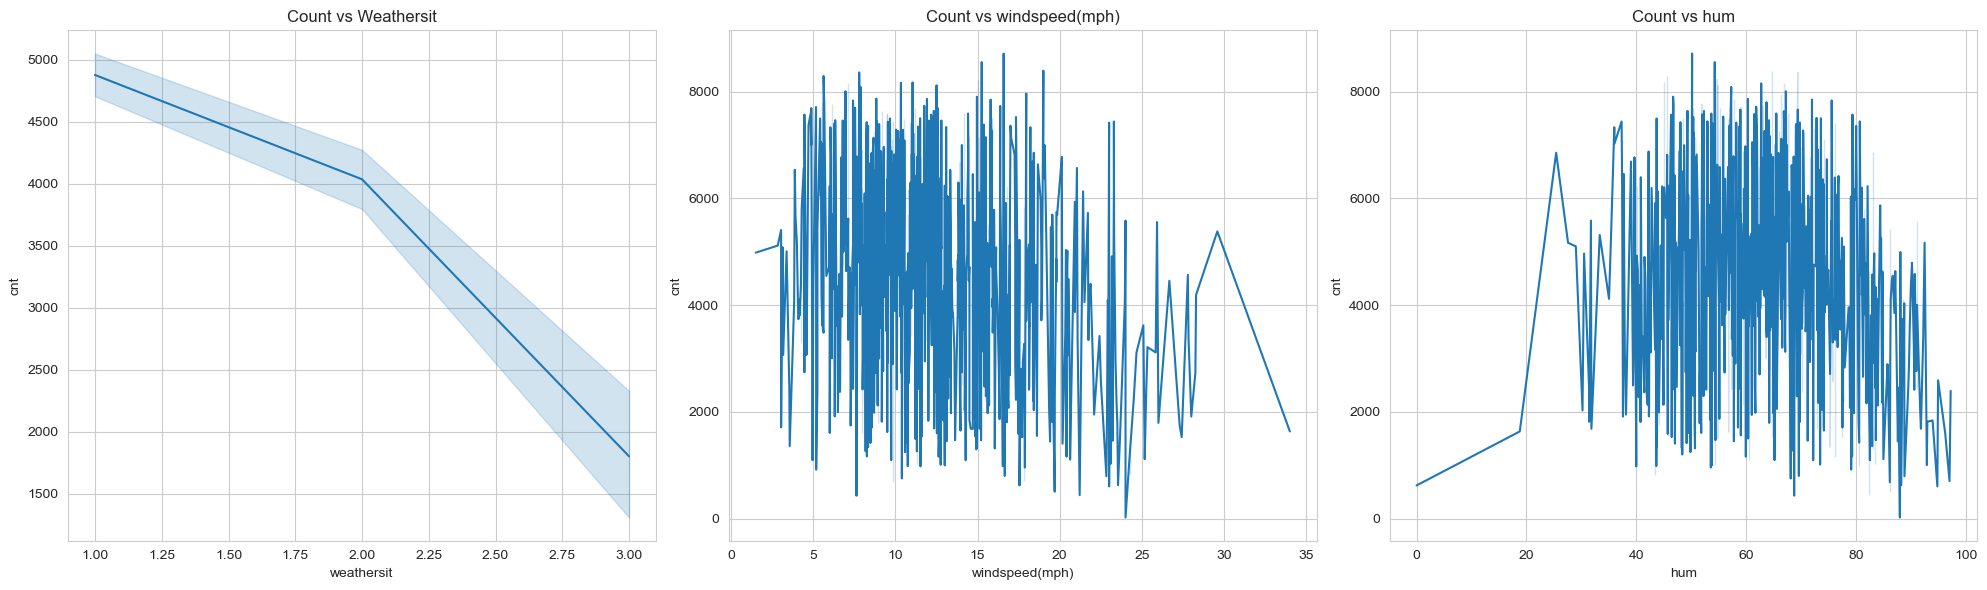

In [88]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot cnt vs weathersit
sns.lineplot(x='weathersit', y='cnt', data=df, ax=axes[0])
axes[0].set_title('Count vs Weathersit')

# Plot cnt vs windspeed(mph)
sns.lineplot(x='windspeed(mph)', y='cnt', data=df, ax=axes[1])
axes[1].set_title('Count vs windspeed(mph)')

# Plot cnt vs hum
sns.lineplot(x='hum', y='cnt', data=df, ax=axes[2])
axes[2].set_title('Count vs hum')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди? - З приводу погоди - так, логічно. 
Частково логічно мабуть і зі швидкістю вітру.
Але з вологістю - не логічно.

#### Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

__Відповідь:__

In [89]:
# Get features with coefficients close to zero
close_to_zero_features = feature_names[np.abs(coef_values) < 1e-3]

print("\nFeatures with coefficients close to zero:")
for feature in close_to_zero_features:
    print(feature)


Features with coefficients close to zero:
windspeed(ms)


In [ ]:
Модель виключила ці дані, оскільки вони є дублюючими, просто в іншій величині

### Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.